In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Numpy 是列表形式的，没有数值标签，而 Pandas 是字典形式。

## 主要数据结构：Series 和 DataFrame

In [22]:
s = pd.Series([1,3,6,np.nan,44,1]) # Series的字符串表现形式为：索引在左边，值在右边。由于没有为数据指定索引，于是会自动创建一个 0 到 N-1 的整数型索引。
print(s)
s = pd.Series(np.random.rand(3), index=["a", "b", "c"]) # 用 numpy.array 创建 Series
print("array:", s.to_numpy()) # Series 回退到 numpy.array
print("list:", s.values.tolist()) # Series 回退到 list

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64
array: [ 1.  3.  6. nan 44.  1.]
list: [1.0, 3.0, 6.0, nan, 44.0, 1.0]


In [3]:
dates = pd.date_range("20210404", periods=6)
print(dates)
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=['a','b','c','d']) # DataFrame是一个表格型的数据结构，既有行索引也有列索引
print(df)
print(df['b'])
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

DatetimeIndex(['2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09'],
              dtype='datetime64[ns]', freq='D')
                   a         b         c         d
2021-04-04  0.455298  0.292048  0.268906  0.169680
2021-04-05  0.670648  0.523611  0.244235  0.916104
2021-04-06  0.680378  0.791399  0.836972  0.715431
2021-04-07  0.148129  0.707692  0.313332  0.319539
2021-04-08  0.071891  0.268907  0.166796  0.718129
2021-04-09  0.056002  0.287437  0.412914  0.649327
2021-04-04    0.292048
2021-04-05    0.523611
2021-04-06    0.791399
2021-04-07    0.707692
2021-04-08    0.268907
2021-04-09    0.287437
Freq: D, Name: b, dtype: float64
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [25]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20220102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
print(df2)
print(df2.dtypes)
print(df2.index) # 查看对列的序号
print(df2.columns) # 查看每种数据的名称
print(df2.values) # 查看所有的值
print(df2.describe()) # 查看数据的总结
print(df2.T) # 翻转数据
print(df2.mean(axis=0)) # 均值
df.mean(axis=0, skipna=False) # 当 skipna=False 的时候，只要遇到了 None 或者 NaN，就不计算这列、行的数据

df = pd.DataFrame({"col1": [1,3], "col2": [2, 4]}, index=["a", "b"])
df.to_numpy() # 回退到 numpy.array

     A          B    C  D      E    F
0  1.0 2022-01-02  1.0  3   test  foo
1  1.0 2022-01-02  1.0  3  train  foo
2  1.0 2022-01-02  1.0  3   test  foo
3  1.0 2022-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
Int64Index([0, 1, 2, 3], dtype='int64')
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
[[1.0 Timestamp('2022-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2022-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2022-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2022-01-02 00:00:00') 1.0 3 'train' 'foo']]
         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0
                     0                    1                    2  \
A                  1.0                  1.0                  1.0   
B  2022-01-02 00:0

<ipython-input-25-a565ab229860>:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df2.mean(axis=0)) # 均值


array([[1, 2],
       [3, 4]])

In [30]:
df = pd.DataFrame(np.arange(12).reshape((4,3)), columns=["c0", "c1", "c2"])
print("sum(axis=0):\n", df.sum(axis=0)) # 累加
print("sum(axis=1):\n", df.sum(axis=1))

print("prod(axis=0):\n", df.prod(axis=0)) # 累乘
print("prod(axis=1):\n", df.prod(axis=1))

print("max():\n", df.max())
print("min():\n", df.min())

print(df.max().max()) # 全局最大最小值
print(df.values.ravel().max())  # 用 Numpy 的方式运算

sum(axis=0):
 c0    18
c1    22
c2    26
dtype: int64
sum(axis=1):
 0     3
1    12
2    21
3    30
dtype: int64
prod(axis=0):
 c0      0
c1    280
c2    880
dtype: int64
prod(axis=1):
 0      0
1     60
2    336
3    990
dtype: int64
max():
 c0     9
c1    10
c2    11
dtype: int64
min():
 c0    0
c1    1
c2    2
dtype: int64


In [5]:
print(df2.sort_index(axis=1, ascending=False)) # 对数据的 index 进行排序并输出
print(df2.sort_index(axis=0, ascending=False))
print(df2.sort_values(by='E')) # 对数据值排序输出

     F      E  D    C          B  A
0  foo   test  3  1.0 2021-04-04  1
1  foo  train  3  1.0 2021-04-04  1
2  foo   test  3  1.0 2021-04-04  1
3  foo  train  3  1.0 2021-04-04  1
   A          B    C  D      E    F
3  1 2021-04-04  1.0  3  train  foo
2  1 2021-04-04  1.0  3   test  foo
1  1 2021-04-04  1.0  3  train  foo
0  1 2021-04-04  1.0  3   test  foo
   A          B    C  D      E    F
0  1 2021-04-04  1.0  3   test  foo
2  1 2021-04-04  1.0  3   test  foo
1  1 2021-04-04  1.0  3  train  foo
3  1 2021-04-04  1.0  3  train  foo


## 选择数据

In [6]:
dates = pd.date_range('20210404',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,-1)), index=dates, columns=['A','B','C','D'])
print(df)
print(df['A'])
print(df[1:4])
print(df['20210405':'20210407'])

             A   B   C   D
2021-04-04   0   1   2   3
2021-04-05   4   5   6   7
2021-04-06   8   9  10  11
2021-04-07  12  13  14  15
2021-04-08  16  17  18  19
2021-04-09  20  21  22  23
2021-04-04     0
2021-04-05     4
2021-04-06     8
2021-04-07    12
2021-04-08    16
2021-04-09    20
Freq: D, Name: A, dtype: int64
             A   B   C   D
2021-04-05   4   5   6   7
2021-04-06   8   9  10  11
2021-04-07  12  13  14  15
             A   B   C   D
2021-04-05   4   5   6   7
2021-04-06   8   9  10  11
2021-04-07  12  13  14  15


In [9]:
# 根据标签 loc
print(df.loc['20210405'])
print(df.loc[:,['A','B']])
print(df.loc['20210407':,['A','B']])
# 根据位置 iloc
print(df.iloc[3:5,1:4])
print(df.iloc[[1,4],[0,3]])

A    4
B    5
C    6
D    7
Name: 2021-04-05 00:00:00, dtype: int64
             A   B
2021-04-04   0   1
2021-04-05   4   5
2021-04-06   8   9
2021-04-07  12  13
2021-04-08  16  17
2021-04-09  20  21
             A   B
2021-04-07  12  13
2021-04-08  16  17
2021-04-09  20  21
             B   C   D
2021-04-07  13  14  15
2021-04-08  17  18  19
             A   D
2021-04-05   4   7
2021-04-08  16  19


In [8]:
print(df[df.A>8]) # 采用判断指令进行选择

             A   B   C   D
2021-04-07  12  13  14  15
2021-04-08  16  17  18  19
2021-04-09  20  21  22  23


In [32]:
df = pd.DataFrame([[1, 2, 3, 0],
                   [3, 4, None, 1],
                   [3, 5, 2, 1],
                   [3, 2, 2, 3]],
                  columns=list("ABCD"))
print(df)
print("idxmax():\n", df.idxmax()) # 找到那个最大最小值的索引
print("idxmax(skipna=False):\n", df.idxmax(skipna=False))
print("idxmin():\n", df.idxmin())

   A  B    C  D
0  1  2  3.0  0
1  3  4  NaN  1
2  3  5  2.0  1
3  3  2  2.0  3
idxmax():
 A    1
B    2
C    0
D    3
dtype: int64
idxmax(skipna=False):
 A    1.0
B    2.0
C    NaN
D    3.0
dtype: float64
idxmin():
 A    0
B    0
C    2
D    0
dtype: int64


## 设置值

In [11]:
dates = pd.date_range('20210404',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,-1)),index=dates,columns=['A','B','C','D'])
df.iloc[2,2] = 111
df.loc['20210406','B'] = 222
df.B[df.A>8] = 0
df['F'] = np.nan
df['E'] = pd.Series([1,2,3,4,5,6],index=dates)
print(df)

             A    B    C   D   F  E
2021-04-04   0    1    2   3 NaN  1
2021-04-05   4    5    6   7 NaN  2
2021-04-06   8  222  111  11 NaN  3
2021-04-07  12    0   14  15 NaN  4
2021-04-08  16    0   18  19 NaN  5
2021-04-09  20    0   22  23 NaN  6


## 处理丢失数据

In [31]:
dates = pd.date_range('20210404',periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,-1)),index=dates,columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df)

# how={'any', 'all'}， 'any': 只要存在 NaN 就 drop ; 'all': 必须全部是 NaN 才 drop 
print(df.dropna(axis=0, how='any')) # 对行进行操作
print(df.dropna(axis=1, how='any')) # 对列进行操作
print(df.fillna(value=0)) # 将 NaN 的值用其他值代替
values = {"A": 0, "B": 1, "C": 2, "D": 3}
print(df.fillna(value=values)) # 对不同特征列做差异化的填充数值

print(df.isnull())
print(np.any(df.isnull())==True) # 检测在数据中是否存在 NaN, 如果存在就返回 True

             A     B     C   D
2021-04-04   0   NaN   2.0   3
2021-04-05   4   5.0   NaN   7
2021-04-06   8   9.0  10.0  11
2021-04-07  12  13.0  14.0  15
2021-04-08  16  17.0  18.0  19
2021-04-09  20  21.0  22.0  23
             A     B     C   D
2021-04-06   8   9.0  10.0  11
2021-04-07  12  13.0  14.0  15
2021-04-08  16  17.0  18.0  19
2021-04-09  20  21.0  22.0  23
             A   D
2021-04-04   0   3
2021-04-05   4   7
2021-04-06   8  11
2021-04-07  12  15
2021-04-08  16  19
2021-04-09  20  23
             A     B     C   D
2021-04-04   0   0.0   2.0   3
2021-04-05   4   5.0   0.0   7
2021-04-06   8   9.0  10.0  11
2021-04-07  12  13.0  14.0  15
2021-04-08  16  17.0  18.0  19
2021-04-09  20  21.0  22.0  23
             A     B     C   D
2021-04-04   0   1.0   2.0   3
2021-04-05   4   5.0   2.0   7
2021-04-06   8   9.0  10.0  11
2021-04-07  12  13.0  14.0  15
2021-04-08  16  17.0  18.0  19
2021-04-09  20  21.0  22.0  23
                A      B      C      D
2021-04-04  False   Tr

## 导入导出

In [11]:
pd.read_excel(index_col=0) # 使用 index_col=0 就是让它使用第一个 column 的数据当做 row 索引
df.to_excel()
data = pd.read_csv('example.csv', index_col=0, sep="=")
df.to_csv()
data.to_pickle('example.pickle')

## 合并数据

In [10]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['A','B','C','D'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['A','B','C','D'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['A','B','C','D'])
res1 = pd.concat([df1,df2,df3], axis=0)  # 0: 纵向, 1: 横向
res2 = pd.concat([df1,df2,df3], axis=0, ignore_index=True) # 重置 index
print(res1)
print(res2)

     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [13]:
s1 = pd.Series([1,2,3,4],index=['A','B','C','D']) # 添加数据
res1 = df1.append(s1, ignore_index=True)
print(res1)
res2 = df1.append([df2, df3],ignore_index=True)
print(res2)

     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0
     A    B    C    D
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [15]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['A','B','C','D'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['B','C','D','E'], index=[2,3,4])
res = pd.concat([df1, df2], axis=0, join='outer') # 默认 outer，纵向合并
print(res)
res1 = pd.concat([df1,df2], join='inner', ignore_index=True)
print(res1)
res2 = pd.concat([df1, df2], axis=1) # 横向合并
print(res2)

     A    B    C    D    E
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0
     B    C    D
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0
     A    B    C    D    B    C    D    E
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


In [16]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
res = pd.merge(left, right, on='key')
print(res)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [16]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                    'key2': ['K0', 'K1', 'K0', 'K1'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                    'key2': ['K0', 'K0', 'K0', 'K0'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

# how = ['left', 'right', 'outer', 'inner']
# inner 合并 key 相同的部分；outer 合并 key 所有的部分
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')  # default for how='inner'
print(res)
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [17]:
df1 = pd.DataFrame({'col1':[0,1], 'A':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'B':[2,2,2]})
print(df1)
print(df2)
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True) # indicator=True会将合并的记录放在新的一列
print(res)
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column') # 自定indicator column的名称
print(res)

   col1  A
0     0  a
1     1  b
   col1  B
0     1  2
1     2  2
2     2  2
   col1    A    B      _merge
0     0    a  NaN   left_only
1     1    b  2.0        both
2     2  NaN  2.0  right_only
3     2  NaN  2.0  right_only
   col1    A    B indicator_column
0     0    a  NaN        left_only
1     1    b  2.0             both
2     2  NaN  2.0       right_only
3     2  NaN  2.0       right_only


In [18]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                    index=['K0', 'K2', 'K3'])
print(left)
print(right)
res = pd.merge(left, right, left_index=True, right_index=True, how='outer') # 依据左右资料集的index进行合并
print(res)
res = pd.merge(left, right, left_index=True, right_index=True, how='inner') # 依据左右资料集的index进行合并
print(res)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [19]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner') # 使用suffixes解决overlapping的问题
print(res)

    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


## 画图

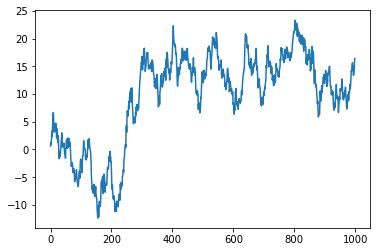

In [17]:
# Series
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

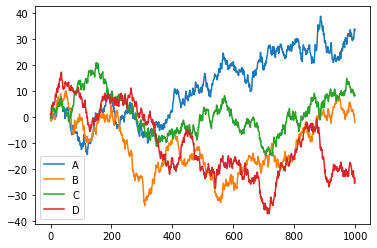

In [18]:
# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
data.plot()
plt.show()
# plot methods: 'bar', 'hist', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie'

<AxesSubplot:xlabel='A', ylabel='C'>

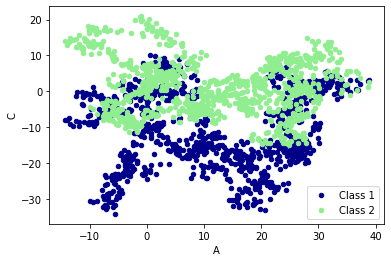

In [19]:
class1 = data.plot.scatter(x='A', y='B', color='DarkBlue', label="Class 1")
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=class1)

## 其他内容

In [22]:
df = pd.DataFrame({'A':['foo','bar']*4, 'B':['one','one','two','three','two','two','one','three'], 'C':np.random.randn(8), 'D':np.random.randn(8)})
print(df)
print(df.groupby('A').sum()) # 数据分组
print(df.groupby(['A','B']).sum())

     A      B         C         D
0  foo    one -1.054872  0.162979
1  bar    one  0.498749  1.030279
2  foo    two -0.650264  0.907854
3  bar  three -0.373368  0.651062
4  foo    two -1.296938 -0.193180
5  bar    two -1.406397 -1.839750
6  foo    one -1.425530  1.698789
7  bar  three  0.938254  1.012923
            C         D
A                      
bar -0.342762  0.854513
foo -4.427603  2.576441
                  C         D
A   B                        
bar one    0.498749  1.030279
    three  0.564886  1.663984
    two   -1.406397 -1.839750
foo one   -2.480402  1.861768
    two   -1.947202  0.714673


In [40]:
df = pd.DataFrame(
    [
        ("小红", "哈利波特", 80),
        ("小明", "蜘蛛侠", 72),
        ("小红", "雷神", 83),
        ("小红", "蜘蛛侠", 45),
        ("小明", "超人", 57),
    ],
    columns=("人", "人物", "评价"),
)
grouped = df.groupby("人")
print(grouped.groups)
print(df.iloc[grouped.groups["小红"]]) # 两种获取不同的组别的方式
print(grouped.get_group("小红"))

print(grouped.first()) # 返回每一个组的第一个数据
print(grouped.last()) # 返回每一个组的最后一个数据
print(grouped.sum())

for name, group in grouped: # 带着两个字段做循环
    print("name:", name)
    print(group)

{'小明': [1, 4], '小红': [0, 2, 3]}
    人    人物  评价
0  小红  哈利波特  80
2  小红    雷神  83
3  小红   蜘蛛侠  45
    人    人物  评价
0  小红  哈利波特  80
2  小红    雷神  83
3  小红   蜘蛛侠  45
      人物  评价
人           
小明   蜘蛛侠  72
小红  哈利波特  80
     人物  评价
人          
小明   超人  57
小红  蜘蛛侠  45


In [43]:
grouped = df.groupby("人")
grouped.aggregate(np.sum) # 聚合操作
grouped["评价"].agg([np.sum, np.mean, np.std])
grouped["评价"].agg([np.sum, np.mean, np.std]).rename(columns={"sum": "合", "mean": "均值", "std": "标准差"})

,合,均值,标准差
人,,,
小明,129,64.5,10.606602
小红,298,74.5,20.108042


In [41]:
df = pd.DataFrame(
    [
        ("小红", "哈利波特", 80),
        ("小明", "蜘蛛侠", 72),
        ("小红", "雷神", 83),
        ("小红", "雷神", 90),
        ("小红", "蜘蛛侠", 45),
        ("小明", "超人", 57),
    ],
    columns=("人", "人物", "评价"),
)
print(df.groupby(["人", "人物"]).get_group(("小红", "雷神"))) # 多重聚合

    人  人物  评价
2  小红  雷神  83
3  小红  雷神  90


In [23]:
df = pd.DataFrame({'A':['one','one','two','three']*3, 'B':['A','B','C']*4, 'C':(['foo']*3+['bar']*3)*2, 'D':np.random.randn(12), 'E':np.random.randn(12)})
print(df)
print(pd.pivot_table(df, values='D', index=['A','B'], columns=['C']))

        A  B    C         D         E
0     one  A  foo -3.291796  2.704268
1     one  B  foo  0.867503  1.174794
2     two  C  foo -0.072596 -0.666124
3   three  A  bar  0.508798 -0.230509
4     one  B  bar  0.758539  0.645396
5     one  C  bar  0.987312  0.016643
6     two  A  foo  1.219825 -2.414790
7   three  B  foo -2.467378  0.792051
8     one  C  foo -0.618171 -2.013014
9     one  A  bar  0.279181 -1.367238
10    two  B  bar  1.416915  0.676812
11  three  C  bar  0.026960 -0.295927
C             bar       foo
A     B                    
one   A  0.279181 -3.291796
      B  0.758539  0.867503
      C  0.987312 -0.618171
three A  0.508798       NaN
      B       NaN -2.467378
      C  0.026960       NaN
two   A       NaN  1.219825
      B  1.416915       NaN
      C       NaN -0.072596


In [36]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
print(df)
df.apply(np.sqrt) # 批处理数据方法

def func(x):
    return x[0] * 2, x[1] * -1

df.apply(func, axis=1, result_type='expand') # result_type="expand" 让输出的结果可以生成多 column
df.apply(func, axis=1, result_type='broadcast') # reult_type="broadcast" 原 column 和 index 名会继承到新生成的数据中

   A  B
0  4  9
1  4  9
2  4  9


,A,B
0,8,-9
1,8,-9
2,8,-9


## 加速技巧

In [2]:
# 从 csv 文件中导入几行
import io
import requests
import pandas as pd
url = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv"
s = requests.get(url).content # read only first 10 rows
df = pd.read_csv(io.StringIO(s.decode('utf-8')), nrows=10, index_col=0)
print(df)

           time  value
1   1949.000000    112
2   1949.083333    118
3   1949.166667    132
4   1949.250000    129
5   1949.333333    121
6   1949.416667    135
7   1949.500000    148
8   1949.583333    148
9   1949.666667    136
10  1949.750000    119


In [16]:
# map() 函数根据相应的输入来映射 Series 的值。
# apply() 允许用户传递函数，并将其应用于 Pandas 序列中的每个值。
import numpy as np
dframe = pd.DataFrame(np.random.randn(4, 3), 
                      columns=list('bde'), 
                      index=['India', 'USA', 'China', 'Russia'])
print(dframe)

dframe['d'] = dframe['d'].map(lambda x: 100*x)
print(dframe)

dframe.apply(lambda x: x.max() - x.min())

               b         d         e
India   0.318855 -0.289892 -2.649669
USA    -1.122057  0.565511  1.200142
China  -0.247194 -0.740230 -0.604386
Russia -0.032590  0.669790 -1.726173
               b          d         e
India   0.318855 -28.989194 -2.649669
USA    -1.122057  56.551144  1.200142
China  -0.247194 -74.022973 -0.604386
Russia -0.032590  66.978975 -1.726173


b      1.440912
d    141.001949
e      3.849811
dtype: float64

In [17]:
# Copy () 函数用于复制 Pandas 对象。
data = pd.Series(['India', 'Pakistan', 'China', 'Mongolia'])
data1 = data
data1[0]='USA'
print(data)

data2 = data.copy()
data2[0]='Changed Value'
print(data)

0         USA
1    Pakistan
2       China
3    Mongolia
dtype: object
0         USA
1    Pakistan
2       China
3    Mongolia
dtype: object
